# Glass Classification 
## Suman Thapaliya


## Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,learning_curve,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import time

## Load dataset from UCI repository
Load the dataset directly from uci repository in pandas dataframe and rename the dataset accordingly. Show the first 5 rows of dataset.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass_df = pd.read_csv(url, header=None, names=column_names)
glass_df.head(5)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# Dataset
Glass dataset is a collection of different types of glasses. Glasses are composed of different chemical compositions like iron, silicon, sodium, calcilum and so on. Dataset contains  the record of 214 glasses which are basically divided into a six types of glasses. These six types are:
## Glass types:
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
5. containers
6. tableware
7. headlamps
## Glass chemical composition: 
Each chemical component is one feature in our case. All the chemical composition are represented in weight percent in our dataset. For an instance: if the value of Na is 13.78, then that glass is made up off 13.78% of sodium. 
other than chemical composotion, the dataset contain one column named 'RI' i.e. refractive index and last column named 'Type' i.e. glass type. Refractive index means how much light bent when travelling from one medium to another.
1. Na = Sodium
2. Mg = Magnesium
3. Al = Aluminum
4. Si = Silicon
5. k  = Potassium 
6. Ca = Calcium
7. Ba = Barium
8. Fe = Iron
## Use case:
One case is criminological investigation. Bases on the glass found on crime scene, it can be used as evidence if it is identified correctly.


## Shape 
There are 214 instances of glass and has 11 features. In our case, features means chemical components, refractive index, and glass type.

In [3]:
glass_df.shape

(214, 11)

## Data Types
All the data are either float or integer numerical number.

In [4]:
glass_df.dtypes

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

## Check missing values
There are no missing values in our dataset.

In [5]:
glass_df.isna().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## Dataset Description
As we can verify that there are no missing values in all columns. All of them contains 214 instnaces. In this description, we can see that standard deviation of Magnisium is highest which is worth while noticing it.

In [6]:
glass_df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Glass Types Verification
We want to see whether there are exactly six unique values as we said that there are 6 types of glasses in our dataset. Based on the result, we verify that there are six types namely '1','2','3','5','6','7'.

In [7]:
glass_df_unique_type = glass_df['Type'].unique()
glass_df_unique_type

array([1, 2, 3, 5, 6, 7], dtype=int64)

## Drop unnecessary column
ID column doesn't help to classify so we drop it.

In [8]:
glass_df.drop('Id', axis=1, inplace=True)

## Seperating target column and features columns
In our case, Type column will be target column as it has a information of glass types. other than that, all the columns will be our features columns i.e. chemical composition and refractive index.

In [9]:
X = glass_df.drop('Type', axis=1)
y = glass_df['Type']

## Create a single train-test split
For preliminary experiment, we created single train-test split where text size is 40% of whole dataset and shuffling is set to true. It is important to set shuffle = True as it helps to reduce overfitting and have randomization.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, stratify=y, random_state=1)

## Default Simple Baseline
Starting a simple baseline model named 'most_frequent'. This baseline model works as simple as by predicting the most frequent class in the training data for every input sample. It will serve as benchmark model to compared against two sophisticated ML models. From result, we can see that the accuracy score of baseline model is 35% i.e. this model predicted 35 times corretly in 100 run.



In [11]:
baseline_model = DummyClassifier(strategy='most_frequent')

baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline Model Accuracy: {baseline_accuracy:.2f}")

Baseline Model Accuracy: 0.35


## Default k-Nearest Neighbors classifier
Running the k-nearest Neigbors classifier in default setting, we can see that it has the accuracy score of 0.7 i.e predicted 7 times correctly in 10 times. It is surely above the accuracy score of baseline model which had an accuray of 35%.

In [12]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"k-NN Model Accuracy in default setting: {knn_accuracy:.2f}")

k-NN Model Accuracy in default setting: 0.70


## Default  Decision Tree classifier
Similarly, Running the decision tree classifier in default setting, we can see that it has the accuracy score of 0.79 i.e. predicted 79 times correctly in 100 times. It is surely above the accuracy score of baseline model  as well as K-Nearest Neighbors classifier which had an accuray of 35% adn 70% respectively.

In [13]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree Model Accuracy in default setting: {tree_accuracy:.2f}")

Decision Tree Model Accuracy in default setting: 0.73


## Nested Cross Validation
Defining the inner cross validation which will be used in GridSearch where as outer cross validation used to evaluate performance of the classifier.

In [14]:
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

## Function to evaluate classifier using outer cross validation on test and train data
This function takes four parameter as input. first, which model you want to evaluate. Second, features columns. third, the target column and outer cross validation as last parameter. It starts the time to calculate the time it requires to complete the task. then, it perfome outer cross validation and store train scores and test scores and print the result as mean accuracy.


In [15]:
def evaluate_classifier(model, X, y, outer_cv):
    tic = time.time()
    
    train_scores = []
    test_scores = []
    
    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train, y_train)
        
        train_score = model.score(X_train, y_train)
        train_scores.append(train_score)
        
        test_score = model.score(X_test, y_test)
        test_scores.append(test_score)
    
    train_scores = np.array(train_scores)
    test_scores = np.array(test_scores)
    
    print(f"Mean training accuracy: {train_scores.mean():.3f} +/- {train_scores.std():.3f}")
    print(f"Mean test accuracy: {test_scores.mean():.3f} +/- {test_scores.std():.3f}")
    print(f"Time for Evaluation: {(time.time()-tic):.3f} seconds.")

## Nested_CV for Simple Baseline
Using the evaluation classifier function, we can see that mean train and test accuracy has significatly low standard deviation and close to default simple baseline values.

In [16]:
print("Baseline Model:")
baseline_accuracy = evaluate_classifier(baseline_model, X, y, outer_cv)

Baseline Model:
Mean training accuracy: 0.355 +/- 0.002
Mean test accuracy: 0.355 +/- 0.009
Time for Evaluation: 0.040 seconds.


## Nested_CV for K-Nearest Neighbors Classifier
In k-Nearest Neighbors Classifier, we use search grid to find the best paramters. we found that metric as manhattan, weights as distance and number of neighbors is 3 yeilds the best accuracy. Moreover, with this best combination of paramters, we can see the increasement in training accuracy upto 5% as compare to default k-Nearest Neighbors Classifier considering SD. 


In [17]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],         
    'weights': ['uniform', 'distance'],              
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

knn = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=inner_cv, n_jobs=5, scoring='accuracy')

knn_grid_cv.fit(X, y)
knn_best_params = knn_grid_cv.best_estimator_

print(f"\nBest Parameters for K-Nearest Neighbors: {knn_best_params}\n")

print("\nK-Nearest Neighbors Classifier:")
evaluate_classifier(knn_best_params, X, y, outer_cv)



Best Parameters for K-Nearest Neighbors: KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')


K-Nearest Neighbors Classifier:
Mean training accuracy: 1.000 +/- 0.000
Mean test accuracy: 0.682 +/- 0.070
Time for Evaluation: 0.183 seconds.


## Nested_CV for Decision Tree Classifier
Similarly, we performe search grid for Decision tree as well. However, we didn't see any significate improvement even after using best parameters. The default decision tree and nested_cv one doesn't differ at the end. To be precise, default setting of decision tree is slightly better even after counting the positive standard deviation.

In [18]:
dtc_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 8, 16],
    'min_samples_leaf': [1, 2, 3, 4],
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]
}

dtc = DecisionTreeClassifier()

dtc_grid_cv = GridSearchCV(estimator=dtc, param_grid=dtc_param_grid, cv=inner_cv, n_jobs=5, scoring='accuracy')
dtc_grid_cv.fit(X, y)

best_dtc = dtc_grid_cv.best_estimator_

print(f"\nBest Parameters for Decision Tree: {dtc_grid_cv.best_estimator_}\n")

print("\nDecision Tree Classifier:")
evaluate_classifier(best_dtc, X, y, outer_cv)


Best Parameters for Decision Tree: DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=10,
                       min_samples_split=8)


Decision Tree Classifier:
Mean training accuracy: 0.929 +/- 0.012
Mean test accuracy: 0.710 +/- 0.033
Time for Evaluation: 0.199 seconds.


## Final Performance Table
In this comprehensive table, we represent the performance of baseline model, K-Nearest Neighbors, and Decision tree classifier by showing their Mean and standard deviation of Accuracy, Precision, Recall, and F1 score. From the table below, we can clearly see that both Ml models performed better than baseline model in all performance category. For instance, mean precision score of baseline model is 0.059 where as 0.70 and 0.65 for decision tree and KNN respectively which is relately way better. However, both the ML models performed poor in our experiment. so, it is hard to choose one best ML moded. Nevertheless, If I had to pick one, them I would go for decision tree beacuse of slighlty better performance than KNN. Decision tree classifier has around 2% better mean accuracy than KNN and better score with small margin in other performance as well. Decision Tree classifier is relatively better so I am carry out further experiment on Decision Tree Classifier.

In [19]:
def custom_precision_score(y_true, y_pred):
    return precision_score(y_true, y_pred, average='macro', zero_division=0)

def custom_recall_score(y_true, y_pred):
    return recall_score(y_true, y_pred, average='macro', zero_division=0)

def custom_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro', zero_division=0)

def evaluate_model(model, X, y, outer_cv):
    accuracy = cross_val_score(model, X, y, cv=outer_cv, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=outer_cv, scoring=make_scorer(custom_precision_score))
    recall = cross_val_score(model, X, y, cv=outer_cv, scoring=make_scorer(custom_recall_score))
    f1 = cross_val_score(model, X, y, cv=outer_cv, scoring=make_scorer(custom_f1_score))
    return accuracy, precision, recall, f1

baseline_metrics = evaluate_model(baseline_model, X, y, outer_cv)
knn_metrics = evaluate_model(knn_best_params, X, y, outer_cv)
tree_metrics = evaluate_model(best_dtc, X, y, outer_cv)

results = pd.DataFrame({
    'Model': ['Baseline', 'Decision Tree', 'k-NN'],
    'Mean Accuracy': [np.mean(baseline_metrics[0]), np.mean(tree_metrics[0]), np.mean(knn_metrics[0])],
    'Accuracy Std': [np.std(baseline_metrics[0]), np.std(tree_metrics[0]), np.std(knn_metrics[0])],
    'Mean Precision': [np.mean(baseline_metrics[1]), np.mean(tree_metrics[1]), np.mean(knn_metrics[1])],
    'Precision Std': [np.std(baseline_metrics[1]), np.std(tree_metrics[1]), np.std(knn_metrics[1])],
    'Mean Recall': [np.mean(baseline_metrics[2]), np.mean(tree_metrics[2]), np.mean(knn_metrics[2])],
    'Recall Std': [np.std(baseline_metrics[2]), np.std(tree_metrics[2]), np.std(knn_metrics[2])],
    'Mean F1 Score': [np.mean(baseline_metrics[3]), np.mean(tree_metrics[3]), np.mean(knn_metrics[3])],
    'F1 Score Std': [np.std(baseline_metrics[3]), np.std(tree_metrics[3]), np.std(knn_metrics[3])]
})

print("Performance Comparison of all three model i.e. Baseline, kNN, and Decision Tree:\n")
print(results)


Performance Comparison of all three model i.e. Baseline, kNN, and Decision Tree:

           Model  Mean Accuracy  Accuracy Std  Mean Precision  Precision Std  \
0       Baseline       0.355150      0.009062        0.059192       0.001510   
1  Decision Tree       0.705426      0.049028        0.700548       0.057492   
2           k-NN       0.681949      0.069880        0.650915       0.076067   

   Mean Recall  Recall Std  Mean F1 Score  F1 Score Std  
0     0.166667    0.000000       0.087347      0.001633  
1     0.704563    0.085103       0.681849      0.070637  
2     0.620298    0.095894       0.624742      0.082939  


## Analysis of Choosen Model (Confusion Matrix)
Decision Tree Classifier had relatively better performance than KNN. so, we analyse the Decision tree further using confusion matrix. Confusion matrix helps to understand whether individual instances are predicted correctly or not. In our case, we can observe that glass type 1 has been predicted almost correctly for all instnces of type 1 except 5 instances. For glass type 1, 23 out of 27 were predicted correctly where as 2 has been misclasssified as glass type 2 and 2 has been misclassified as glass type 3. It is interesting to see that glass type 3 i.e. vehicle_windows_float_processed has not been classified properly. Almost all of them has been misclassified.

Confusion Matrix:
 [[23  3  2  0  0  0]
 [ 3 26  1  0  0  0]
 [ 4  1  2  0  0  0]
 [ 0  1  0  4  0  0]
 [ 1  1  0  0  2  0]
 [ 1  1  0  0  0 10]]


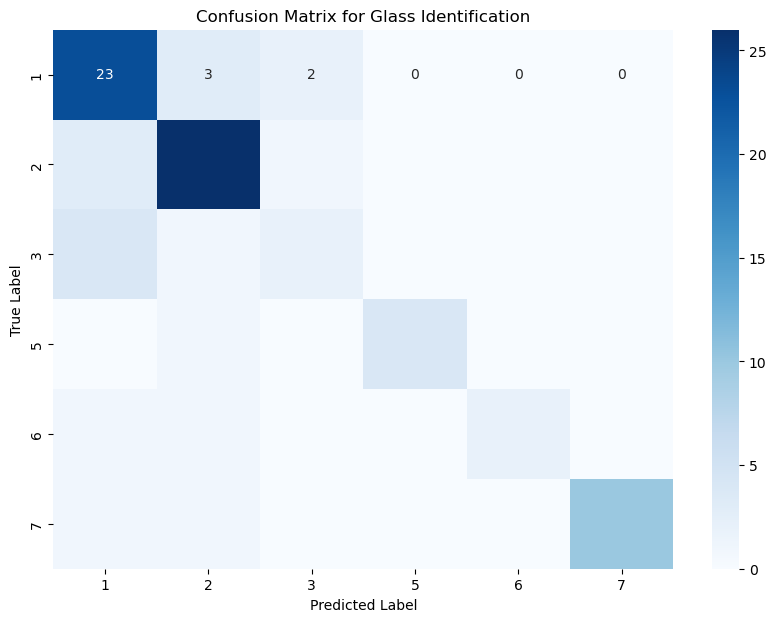

In [20]:
grid_search = GridSearchCV(estimator=dtc, param_grid=dtc_param_grid, cv=inner_cv, n_jobs=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_dtc = grid_search.best_estimator_

y_pred = best_dtc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Glass Identification')
plt.show()

## Feature Importance According To Decision Tree Classifier
Feature Importance helps to understand the influential factor that each features in dataset has to predict. In Decision Tree Classifier, Aluminum has the most influence to predict where as Magnesium, Refractive Index, Calcium, Potassium, and Barium has moderate influences.

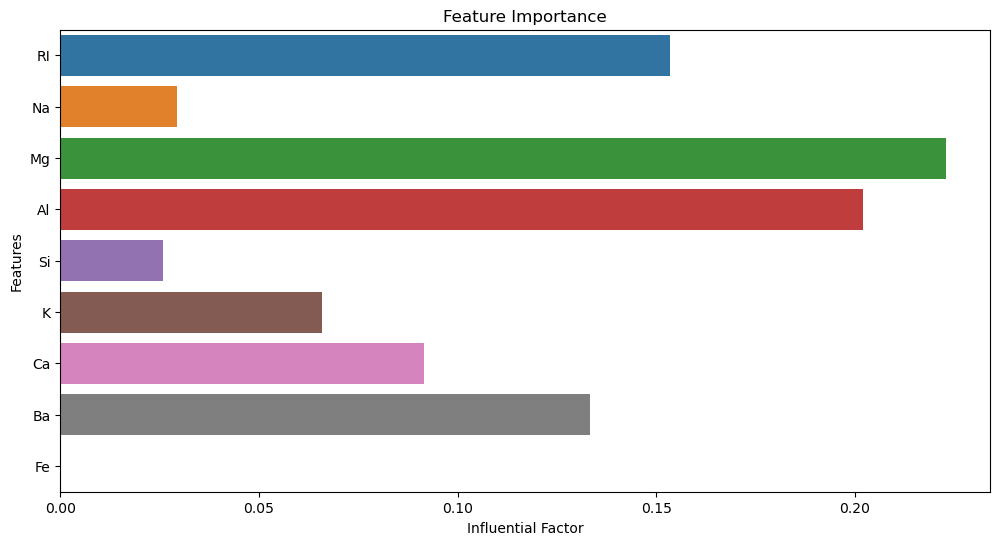

In [21]:
perm_importance = permutation_importance(best_dtc, X_test, y_test, n_repeats=30, random_state=1)

feature_importances = perm_importance.importances_mean
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Influential Factor')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

## Conclusion
In our Experiment, we set up three different model i.e. Baseline model, KNN , and Decision Tree Classifier. we initially applied these algorithms in default setting to our glass identification dataset and observe the result. Result from the initail set up, we observed that both KNN and Decision Tree Classifier outperformed the Baseline model as the accuracy of baseline model was 35% where as decision tree and KNN had 79% and 70% repectively.
After, we conducted the nested cross validation in all models and see the outcome where they performed better or not. It was bit of surprise that after applying the search grid and tuning the parameters, we didn't see better result which was totally opposite of what we thought. In all models, KNN shows a bit of improvement if we count the standard deviation as upper accuray value could jump up to 75% which is 5% more than the default KNN had. However, considering all the performance matrix like accuracy, precision, recall and F1 score, Decision tree was slighlt better than KNN and far better than Baseline model. Mean accuray score of decision tree compare to KNN was 2% better. similarly, 5% better in mean precision score. so, we continue to explore decision tree by calculating confusion matrix. there we see that alot of instances were misclassified particularly glass type 3. Moreover, We try to see the feature imporatnce according to decision tree and found that aluminum had the most infuence among others to predict. In conclusion, we can say that Ml models are far better than baseline models and bit of surprice at the end as even both ML models could not performed very well in glass dataset.